# Task

There should be 3 variants of classifiers (stacking, boosting, begging)

---



Mandatory steps:

primary data analysis (absence of gaps, presence of categorical features, ...)

feature engineering (build 1-2 new features)

feature scaling

division of the dataset into training, validation and test parts

training of the base model with default hyperparameters

selection of hyperparameters

evaluation of results

# import libraries

In [1]:
# connect to drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import lightgbm

import re

#load dataset

In [3]:
# load data from drive
data = pd.read_csv("/content/drive/MyDrive/Hillel_ML_Course/9/data.csv")

In [4]:
seed = 42
scaler = StandardScaler()

#exploatory data analysys

In [5]:
data.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [6]:
test_char = "process.b2.capacity"


In [7]:
# Let's see data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [8]:
data.columns

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')

In [9]:
# change sumb . to _
def change_symb(columns):
  return [re.sub(r'\.', '_', col) for col in columns]

In [10]:
#rename columns
columns_list = data.columns.to_list()

#new names columns list
new_names_list = change_symb(columns_list)

In [11]:
#rename columns
columns_list = data.columns.to_list()

#new names columns list
new_names_list = change_symb(columns_list)
#change columns name
data.rename(columns=dict(zip(columns_list, new_names_list)), inplace=True)
data.head(2)

,process_b1_capacity,process_b2_capacity,process_b3_capacity,process_b4_capacity,property_price,property_product,property_winner,verification_result,verification_time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000


In [12]:
# change bool false-true to 0-1
data["verification_result"] = data["verification_result"].astype(int)
data.head(2)

,process_b1_capacity,process_b2_capacity,process_b3_capacity,process_b4_capacity,property_price,property_product,property_winner,verification_result,verification_time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000



ordon.t1-3154445-small.gif

 This model consists of three subprocesses: availability of bidders, bidding of each bidder, and winner determination. The first subprocess checks whether bidders can afford additional products that they have not won yet (availability of bidders). The auction continues if there is at least one qualified bidder who can place a bid in Subprocess bidding of each bidder. Activity place bid issues a random bid between the current price of the product and the budget of the qualified bidder. In our process model, bidders will always bid if they have both budget and capacity left to acquire a product. Activity decrease capacity decreases the capacity of the bidder who just won a product. If a bidder has no capacity left, Activity remove bid removes their bids. Subprocess winner determination outputs the new reserve prices and the winners based on the existing bids. These three subprocesses are repeated until no more bids are placed. The resulting BPMN model to represent the German 4G spectrum auction consists of 423 control-flow elements and 150 data objects.

## plotts

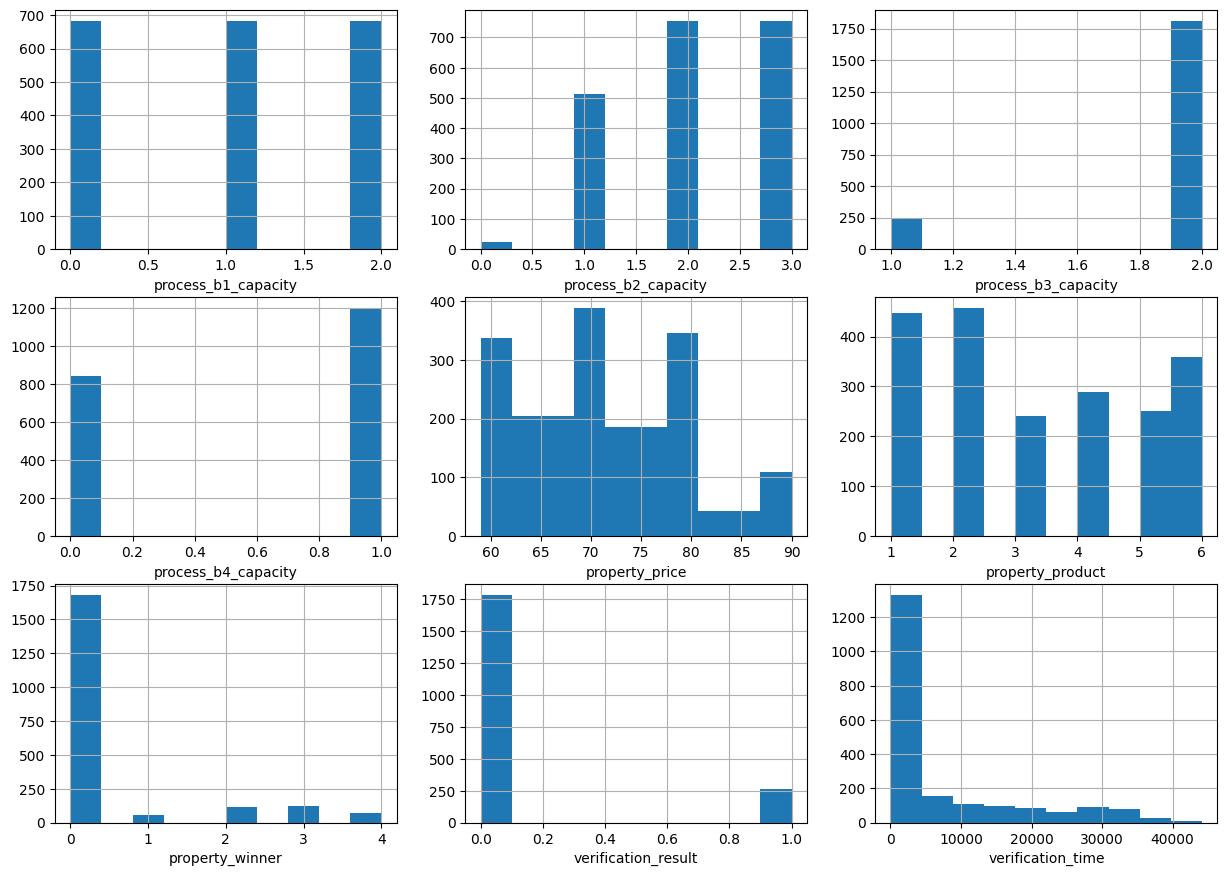

In [13]:
# let's see how much unique values in data
plt.figure(figsize=[15,18])

n=1
for column in new_names_list:
  plt.subplot(5,3,n)
  data[column].hist()
  plt.xlabel(column)
  n+=1
# plt.tight_layout()
plt.show()

From this plot we know :

target(result) is unbalanced, so in future we need improve some technic

process_b2_capacity 0.0 values has small count and in future we can see how it can improve accuracy

most frequantly prices are 60, 70, 80 (because there are rounded
) and numbers like 65, 75, 85 not used in common

verification time bit long and most values from 0 to 5000 seconds

process_b3_capacity and property_winner has unbalanced data to, we will see on their future importance after balance data by target





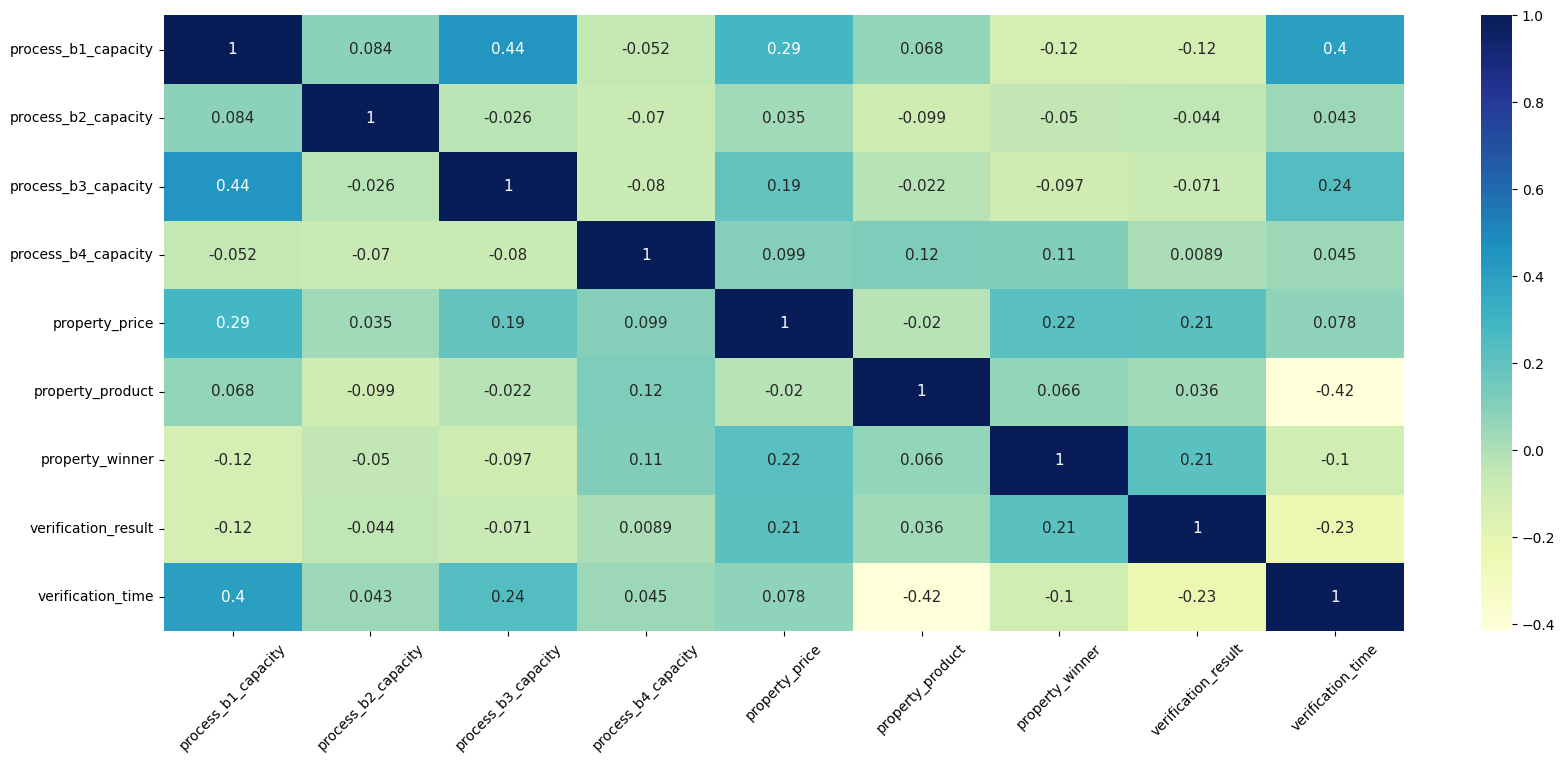

In [14]:
# let's see correlation between features and target
#data_corr = data.corr()

corr_matrix = data[new_names_list].corr()

plt.figure(figsize=(20, 8))

# Create mask
mask = np.triu(data[new_names_list])

#Create heatmap:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11},)
plt.xticks(rotation=45)
plt.show()

Conclusion

result most corrlated with winner
and price
price correlated with capacities

#feature engeneering

let's create 2 features

In [15]:
#capacities to list
cap_list  = data.columns.to_list()
cap_list = cap_list[0:4]

In [16]:
cap_list

['process_b1_capacity',
 'process_b2_capacity',
 'process_b3_capacity',
 'process_b4_capacity']

In [17]:
#sum capacity
data["sum_capacity"] =data[cap_list[0]]+data[cap_list[1]]+data[cap_list[2]] \
                      +data[cap_list[3]]

In [18]:
data["price_to_cap"] = data["property_price"] / data["sum_capacity"]

# validation, train, test split

in case when verification time influence on result i'll drop it

In [19]:
# split data into 2 dataset
data_test, data_valid = train_test_split(data, train_size=0.8, shuffle=True,
                                         random_state=seed)

In [20]:
# features
X_valid = data_valid.drop(columns=["verification_result", "verification_time"], axis=0)
#target
y_valid = data_valid["verification_result"]

In [21]:
# features
X = data_test.drop(columns=["verification_result", "verification_time"], axis=0)
#target
y = data_test["verification_result"]

In [22]:
# make train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,
                                                shuffle=True, random_state=seed)

#baseline RandomForest classifier

##pipeline

In [23]:
#define baseline classifier
rf_base = RandomForestClassifier(random_state=seed)

In [24]:
# make baseline pipeline
rf_base_pipeline = make_pipeline(scaler, rf_base)

In [25]:
rf_base_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

##cross validation

In [26]:
#cross validation
cv_base = cross_val_score(rf_base_pipeline, X_train, y_train, cv=5)

In [27]:
#baseline score
base_score = cv_base.mean()

print(f"the baseline random forest classifier cv score is {base_score}")

the baseline random forest classifier cv score is 0.9533298236377995


In [28]:
#predict data
base_pred = rf_base_pipeline.predict(X_test)

it is very iteresting :)

## classification report

In [29]:
# print classification report
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       291
           1       0.81      0.83      0.82        36

    accuracy                           0.96       327
   macro avg       0.90      0.90      0.90       327
weighted avg       0.96      0.96      0.96       327



In [30]:
base_valid_pred = rf_base_pipeline.predict(X_valid)

In [31]:
print(classification_report(y_valid, base_valid_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       354
           1       0.91      0.89      0.90        55

    accuracy                           0.97       409
   macro avg       0.95      0.94      0.94       409
weighted avg       0.97      0.97      0.97       409



## feature importance

In [32]:
# define feature importance method to variable
feature_importances = rf_base_pipeline.named_steps['randomforestclassifier']. \
                                                            feature_importances_

In [33]:
# print feature importance with values
for name, importance in zip(X_train, feature_importances):
  print(name, "=", importance)


process_b1_capacity = 0.035794237961331854
process_b2_capacity = 0.04025575252844438
process_b3_capacity = 0.012010324091692543
process_b4_capacity = 0.01929353897490225
property_price = 0.2635537510956461
property_product = 0.14427254649493335
property_winner = 0.30992806285780755
sum_capacity = 0.03867059744829486
price_to_cap = 0.13622118854694723


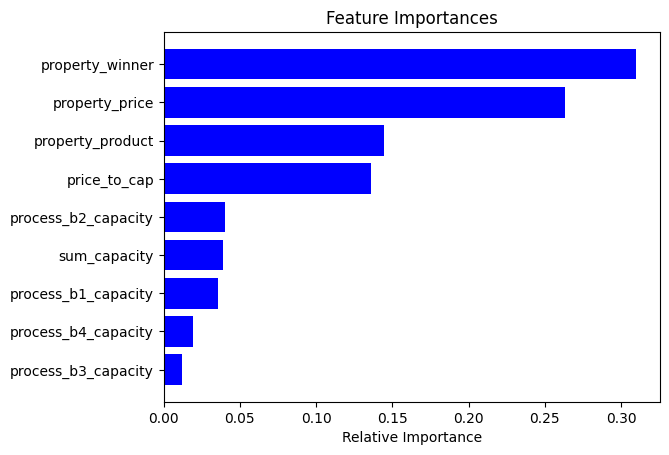

In [34]:
# plot feature importance
features = X.columns.to_list()
importances = feature_importances
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Bagging

for bagging i'll use random forest with grid search cv

In [293]:
rf = RandomForestClassifier(random_state=seed)

In [294]:
# rf parameters

rf_params = {'max_depth': [3,5,10],
    'n_estimators': [100, 200, 300],
    'max_features': [10, 20, 30],
}

In [295]:
# make baseline pipeline
rf_pipeline = make_pipeline(scaler, GridSearchCV(rf, rf_params, cv=5))

In [296]:
rf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              param_grid={'max_depth': [3, 5, 10],
                                          'max_features': [10, 20, 30],
                                          'n_estimators': [100, 200, 300]}))])

##cross validation

In [297]:
#cross validation
rf_cv = cross_val_score(rf_pipeline, X_train, y_train, cv=5)

In [298]:
#baseline score
rf_score = rf_cv.mean()

print(f"the random forest classifier cv score is {rf_score}")

the random forest classifier cv score is 0.973984381854874


In [299]:
#predict data
rf_pred = rf_pipeline.predict(X_test)

## classification report

In [300]:
# print classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       291
           1       0.95      1.00      0.97        36

    accuracy                           0.99       327
   macro avg       0.97      1.00      0.98       327
weighted avg       0.99      0.99      0.99       327



In [301]:
rf_valid_pred = rf_pipeline.predict(X_valid)

In [302]:
print(classification_report(y_valid, rf_valid_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       354
           1       0.95      0.96      0.95        55

    accuracy                           0.99       409
   macro avg       0.97      0.98      0.97       409
weighted avg       0.99      0.99      0.99       409



In [303]:
#looking for best parameters of gridsearch

rf_grid_search = rf_pipeline.named_steps['gridsearchcv']

print("Best parameters:", rf_grid_search.best_params_)


Best parameters: {'max_depth': 10, 'max_features': 10, 'n_estimators': 200}


In [335]:
rf_best = RandomForestClassifier(**rf_grid_search.best_params_, random_state=seed)

In [336]:
rf_best

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=200,
                       random_state=42)

#Boosting

for boosting i'll use model Light gbm model

##xgboost

In [304]:
xgboost = xgb.XGBClassifier(random_state=seed)

In [305]:
# rf parameters

xgboost_param = {"max_depth": np.arange(1, 8, 1),
                "n_estimators": np.arange(100,300,100)
}

In [306]:
# make baseline pipeline
xgboost_pipeline = make_pipeline(scaler, GridSearchCV(xgboost, xgboost_param, cv=5))

In [307]:
xgboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      i...
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                              param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                                          'n_estimators': array([100, 200])}))])

###cross validation

In [308]:
#cross validation
xgboost_cv = cross_val_score(xgboost_pipeline, X_train, y_train, cv=5)

In [309]:
#baseline score
xgboost_score = xgboost_cv.mean()

print(f"the xgboost classifier cv score is {xgboost_score}")

the xgboost classifier cv score is 0.9885115966189932


In [310]:
#predict data
xgboost_pred = xgboost_pipeline.predict(X_test)

### classification report

In [311]:
# print classification report
print(classification_report(y_test, xgboost_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       291
           1       0.95      1.00      0.97        36

    accuracy                           0.99       327
   macro avg       0.97      1.00      0.98       327
weighted avg       0.99      0.99      0.99       327



In [312]:
xgboost_valid_pred = xgboost_pipeline.predict(X_valid)

In [313]:
print(classification_report(y_valid, xgboost_valid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       0.98      1.00      0.99        55

    accuracy                           1.00       409
   macro avg       0.99      1.00      0.99       409
weighted avg       1.00      1.00      1.00       409



In [314]:
#looking for best parameters of gridsearch

xgboost_grid_search = xgboost_pipeline.named_steps['gridsearchcv']

print("Best parameters:", xgboost_grid_search.best_params_)


Best parameters: {'max_depth': 3, 'n_estimators': 200}


In [337]:
xgboost_best_param = xgb.XGBClassifier(**xgboost_grid_search.best_params_, random_state=seed)

##LightGBM

In [471]:
lgbm = lightgbm.LGBMClassifier(random_state=seed)

In [473]:
# rf parameters

lgbm_param = {"num_leaves": np.arange(31, 33, 1),
                "learning_rate": np.arange(0.01,0.1,0.01),
                "n_estimators ": np.arange(100,300,100),
}

In [474]:
# make baseline pipeline
lgbm_pipeline = make_pipeline(scaler, GridSearchCV(lgbm, lgbm_param, cv=5))

In [476]:
lgbm_pipeline.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 1045, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130144 -> initscore=-1.899690
[LightGBM] [Info] Start training from score -1.899690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
                              param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                          'n_estimators ': array([100, 200]),
                                          'num_leaves': array([31, 32])}))])

###cross validation

In [478]:
#cross validation
lgbm_cv = cross_val_score(lgbm_pipeline, X_train, y_train, cv=5)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 110, number of negative: 727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points 

In [479]:
#baseline score
lgbm_score = lgbm_cv.mean()

print(f"the xgboost classifier cv score is {lgbm_score}")

the xgboost classifier cv score is 0.9908133719399842


In [480]:
#predict data
lgbm_pred = lgbm_pipeline.predict(X_test)

[LightGBM] [Warning] Unknown parameter: 100


### classification report

In [481]:
# print classification report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       291
           1       0.88      0.97      0.92        36

    accuracy                           0.98       327
   macro avg       0.94      0.98      0.96       327
weighted avg       0.98      0.98      0.98       327



In [484]:
lgbm_valid_pred = lgbm_pipeline.predict(X_valid)

[LightGBM] [Warning] Unknown parameter: 100


In [485]:
print(classification_report(y_valid, lgbm_valid_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       354
           1       0.96      1.00      0.98        55

    accuracy                           1.00       409
   macro avg       0.98      1.00      0.99       409
weighted avg       1.00      1.00      1.00       409



In [486]:
#looking for best parameters of gridsearch

lgbm_grid_search = lgbm_pipeline.named_steps['gridsearchcv']

print("Best parameters:", lgbm_grid_search.best_params_)


Best parameters: {'learning_rate': 0.08, 'n_estimators ': 100, 'num_leaves': 32}


In [487]:
lgbm_best= lightgbm.LGBMClassifier(**lgbm_grid_search.best_params_, random_state=seed)

# Stacking

for this method i'll use : SGDClassifier, KNNClassifier, SVclssifier
by first i'll find best hyperparameters with GridSearchCV and after i'll stack them

## SGDClassifier

In [35]:
sgd = SGDClassifier(random_state=seed)

In [36]:
# params for gridsearch
sgd_params = {"alpha": np.arange(0.0002, 0.0003, 0.00001),
              "l1_ratio": np.arange(1e-09, 1e-05, 1e-01),
              "max_iter": np.arange(100, 104, 2)
}

In [37]:
# make pipeline
sgd_pipeline = make_pipeline(scaler, GridSearchCV(sgd, sgd_params, cv=5))

In [38]:
sgd_pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
                              param_grid={'alpha': array([0.0002 , 0.00021, 0.00022, 0.00023, 0.00024, 0.00025, 0.00026,
       0.00027, 0.00028, 0.00029]),
                                          'l1_ratio': array([1.e-09]),
                                          'max_iter': array([100, 102])}))])

In [39]:
sgd_cv = cross_val_score(sgd_pipeline, X_train, y_train, cv=5)

print(f" the best cv scroe is: {sgd_cv.mean()}")

 the best cv scroe is: 0.8607323564680763


In [40]:
#looking for best parameters of gridsearch

sgd_grid_search = sgd_pipeline.named_steps['gridsearchcv']

print("Best parameters:", sgd_grid_search.best_params_)

Best parameters: {'alpha': 0.00026000000000000003, 'l1_ratio': 1e-09, 'max_iter': 100}


In [41]:
# define model with best params
sgd_best = SGDClassifier(**sgd_grid_search.best_params_, random_state=seed)

In [42]:
#check it
sgd_best

SGDClassifier(alpha=0.00026000000000000003, l1_ratio=1e-09, max_iter=100,
              random_state=42)

##KNNClassifier

In [43]:
knn = KNeighborsClassifier()

In [145]:
#knn gridsearch params
knn_params = {"n_neighbors":np.arange(2,6,1),
              "leaf_size": np.arange(40, 44, 1)
}

In [146]:
# make pipeline
knn_pipeline = make_pipeline(scaler, GridSearchCV(knn, knn_params, cv=5))

In [147]:
knn_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'leaf_size': array([40, 41, 42, 43]),
                                          'n_neighbors': array([2, 3, 4, 5])}))])

In [148]:
knn_cv = cross_val_score(knn_pipeline, X_train, y_train, cv=5)

print(f" the best cv scroe is: {knn_cv.mean()}")

 the best cv scroe is: 0.8821707466877248


In [149]:
#looking for best parameters of gridsearch

knn_grid_search = knn_pipeline.named_steps['gridsearchcv']

print("Best parameters:", knn_grid_search.best_params_)

Best parameters: {'leaf_size': 40, 'n_neighbors': 3}


In [339]:
# define model with best params
knn_best = KNeighborsClassifier(**knn_grid_search.best_params_,)

In [50]:
#check it
knn_best

KNeighborsClassifier(leaf_size=40, n_neighbors=3)

## SVC

In [51]:
svc = SVC(random_state=seed)

In [52]:
#svc gridsearch params
svc_params = {"degree":np.arange(2,5,1)
}

In [53]:
# make pipeline
svc_pipeline = make_pipeline(scaler, GridSearchCV(svc, svc_params, cv=5))

In [54]:
svc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVC(random_state=42),
                              param_grid={'degree': array([2, 3, 4])}))])

In [55]:
svc_cv = cross_val_score(svc_pipeline, X_train, y_train, cv=5)

print(f" the best cv scroe is: {svc_cv.mean()}")

 the best cv scroe is: 0.8745196104237957


In [56]:
#looking for best parameters of gridsearch

svc_grid_search = svc_pipeline.named_steps['gridsearchcv']

print("Best parameters:", svc_grid_search.best_params_)

Best parameters: {'degree': 2}


In [340]:
# define model with best params
svc_best = SVC(**svc_grid_search.best_params_, random_state=seed)

In [341]:
#check it
svc_best

SVC(degree=2, random_state=42)

##Decision tree


In [275]:
treeclf = DecisionTreeClassifier(random_state=seed)

In [276]:
#svc gridsearch params
treeclf_params = {"min_samples_split":np.arange(2,3),
           "min_samples_leaf":np.arange(1,2),
           "ccp_alpha":np.arange(0.0,0.3, 0.1)
}

In [277]:
# make pipeline
treeclf_pipeline = make_pipeline(scaler, GridSearchCV(treeclf, treeclf_params, cv=5))

In [278]:
treeclf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=42),
                              param_grid={'ccp_alpha': array([0. , 0.1, 0.2]),
                                          'min_samples_leaf': array([1]),
                                          'min_samples_split': array([2])}))])

In [279]:
treeclf_cv = cross_val_score(treeclf_pipeline, X_train, y_train, cv=5)

print(f" the best cv scroe is: {treeclf_cv.mean()}")

 the best cv scroe is: 0.9762803076833084


In [280]:
#looking for best parameters of gridsearch

treeclf_grid_search = treeclf_pipeline.named_steps['gridsearchcv']

print("Best parameters:", treeclf_grid_search.best_params_)

Best parameters: {'ccp_alpha': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [342]:
# define model with best params
treeclf_best = DecisionTreeClassifier(**treeclf_grid_search.best_params_, random_state=seed)

In [282]:
#check it
treeclf_best

DecisionTreeClassifier()

## StackingClassifier

In [458]:
# base learners
base_learners = [
     ('knn', knn_best),
     ('sgd', sgd_best),
     ("svc", svc_best),
     ("dctr", treeclf_best),
     ("xgb", xgboost_best_param),
     ("rf", rf_best),
     ("ltgbm", lgbm_best)
]


#meta-learner
meta_learner = lgbm_best

In [459]:
stk_cl = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, passthrough=True, )

In [460]:
stk_cl_pipeline = make_pipeline(scaler, stk_cl)

In [461]:
stk_cl_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 171, number of negative: 1136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 1307, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130834 -> initscore=-1.893605
[LightGBM] [Info] Start training from score -1.893605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 137, number of negative: 908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('knn',
                                                 KNeighborsClassifier(leaf_size=40,
                                                                      n_neighbors=3)),
                                                ('sgd',
                                                 SGDClassifier(alpha=0.00026000000000000003,
                                                               l1_ratio=1e-09,
                                                               max_iter=100,
                                                               random_state=42)),
                                                ('svc',
                                                 SVC(degree=2,
                                                     random_state=42)),
                                                ('dctr',
                                                 DecisionTreeClassifier(random_state=42)),
                                                ('xgb...
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=200,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=10,
                                                                        max_features=10,
                                                                        n_estimators=200,
                                                                        random_state=42)),
                                                ('ltgbm', LGBMClassifier())],
                                    final_estimator=RandomForestClassifier(max_depth=10,
                                                                           max_features=10,
                                                                           n_estimators=200,
                                                                           random_state=42),
                                    passthrough=True))])

### test and valid data

In [462]:
#cross validation score
stk_cl_cv = cross_val_score(stk_cl_pipeline, X_train, y_train, cv=5)


[LightGBM] [Info] Number of positive: 137, number of negative: 908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 1045, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.131100 -> initscore=-1.891263
[LightGBM] [Info] Start training from score -1.891263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [464]:
#mean cv score
stk_cl_best_score = stk_cl_cv.mean()

print(f"stacking cv score is {stk_cl_best_score.mean()}")

stacking cv score is 0.9915767307186101


In [490]:
#predict nodel
stk_cl_pred = stk_cl_pipeline.predict(X_test)#

In [492]:
print(classification_report(y_test, stk_cl_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       291
           1       0.95      0.97      0.96        36

    accuracy                           0.99       327
   macro avg       0.97      0.98      0.98       327
weighted avg       0.99      0.99      0.99       327



In [493]:
#validation
stk_cl_valid_pred = stk_cl_pipeline.predict(X_valid)

In [494]:
print(classification_report(y_valid, stk_cl_valid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       0.98      1.00      0.99        55

    accuracy                           1.00       409
   macro avg       0.99      1.00      0.99       409
weighted avg       1.00      1.00      1.00       409



#Summary

From the comparison above, xgboost and randomforest work well on this type of data. I think you need to tweak the stacking better. and the models in this method work poorly because unbalanced classes, unlike tree models.

Summary below from first try.

So, in first try stacking with SGD, KNN, SVC had score near 0.88. After than i added another models i increased it up to 0.99. And now it has 1st plaice if compare with other 3 models

In [495]:
score = {"xgboost": xgboost_score,
         "random forest": rf_score,
         "stacking classifier" : stk_cl_best_score,
         "LightGBM": lgbm_score}

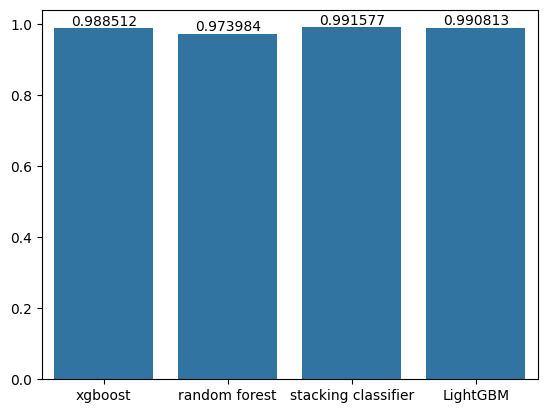

In [496]:
ax = sns.barplot(data=score, x=score.keys(),y=score.values(),
                 err_kws={'linewidth': 0})

for i in ax.containers:
    ax.bar_label(i,)
